In [1]:
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
plt.rcParams['figure.figsize'] = (14, 8)

In [3]:
fits_file = "eclipsing_binaries/tess-s0005-1-1_65.170600_-1.740100_100x100_astrocut.fits"
# fits_file = "tess-s0002-4-2_83.272000_-69.508733_64x64_astrocut.fits"

In [4]:
eb = tess_cpm.Source(fits_file, remove_bad=True)

Removing 23 bad data points (out of 1196) using the TESS provided QUALITY array


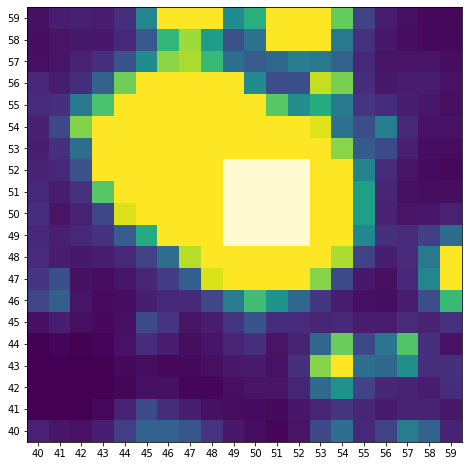

In [5]:
eb.set_aperture(rowrange=[49, 53], colrange=[49, 53])
eb.plot_cutout(rowrange=[40, 60], colrange=[40, 60], show_aperture=True)

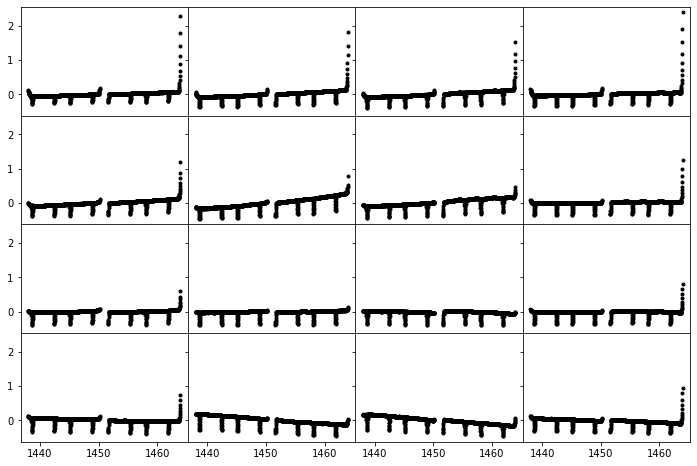

In [6]:
eb.plot_pix_by_pix("normalized_flux")

In [7]:
eb.add_cpm_model()
eb.set_regs([0.01])
eb.holdout_fit_predict(k=10);

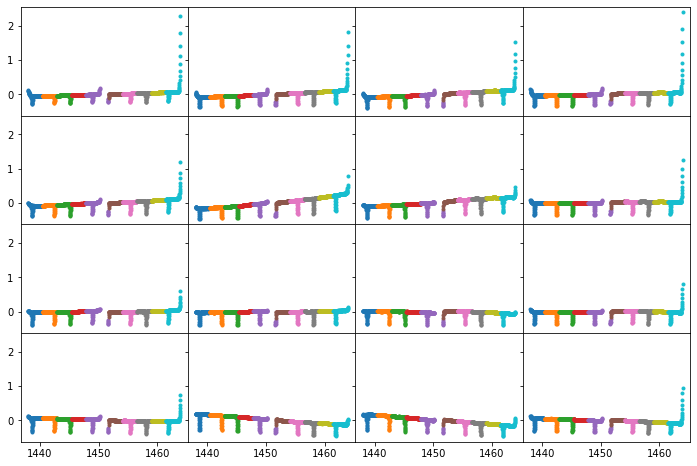

In [8]:
eb.plot_pix_by_pix("normalized_flux", split=True)

Summing over 4 x 4 pixel lightcurves


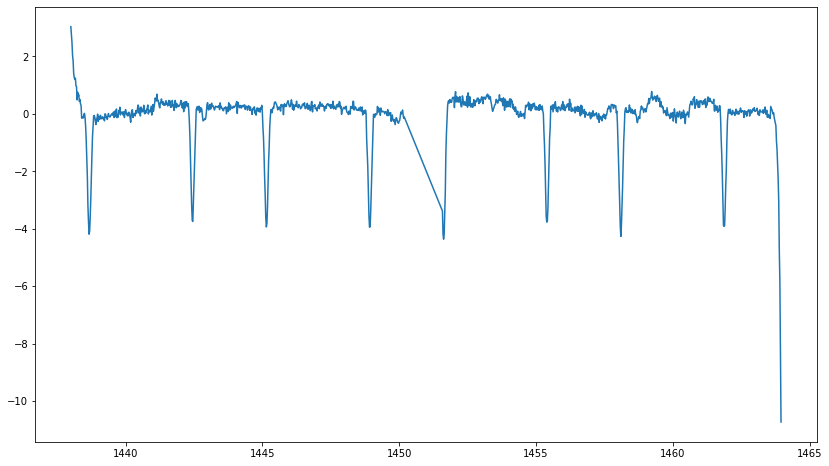

In [9]:
lc = eb.get_aperture_lc("cpm_subtracted_flux")
plt.plot(eb.time, lc)

Summing over 4 x 4 pixel lightcurves


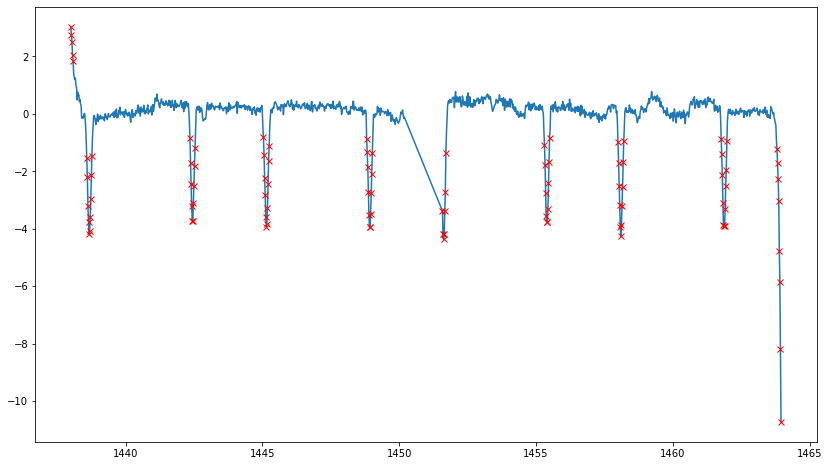

In [10]:
outliers = eb.get_outliers(sigma=1)
plt.plot(eb.time, lc)
plt.plot(eb.time[outliers], lc[outliers], "x", c="red")

In [11]:
eb.holdout_fit_predict(k=10, mask=~outliers);

Using user-provided mask. Clipping 94 points.


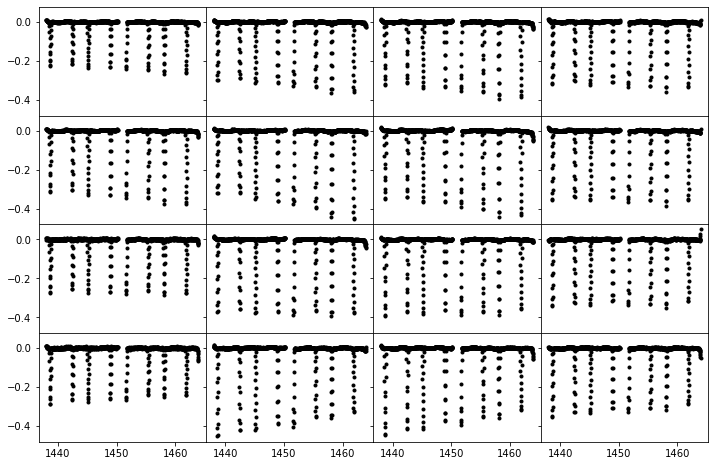

In [12]:
eb.plot_pix_by_pix("cpm_subtracted_flux")

Summing over 4 x 4 pixel lightcurves


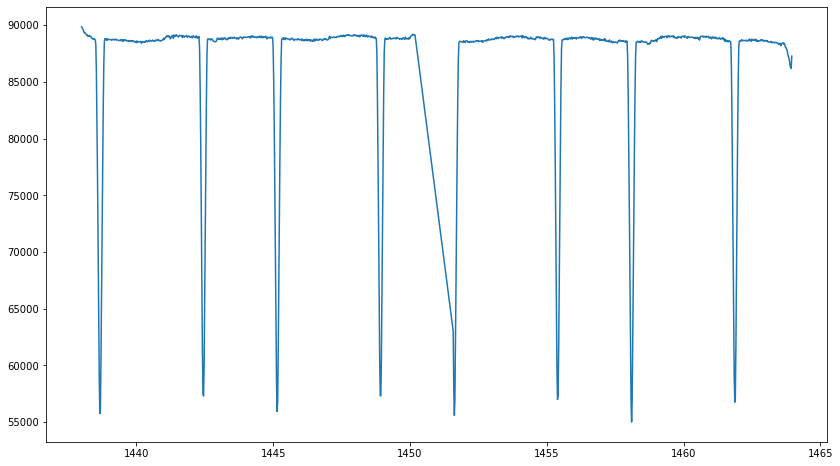

In [14]:
a = eb.get_aperture_lc("rescaled_cpm_subtracted_flux")
plt.plot(eb.time, a)

/home/soichiro/miniconda3/envs/daily/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Max Power Period: 1.2921503216934642 d


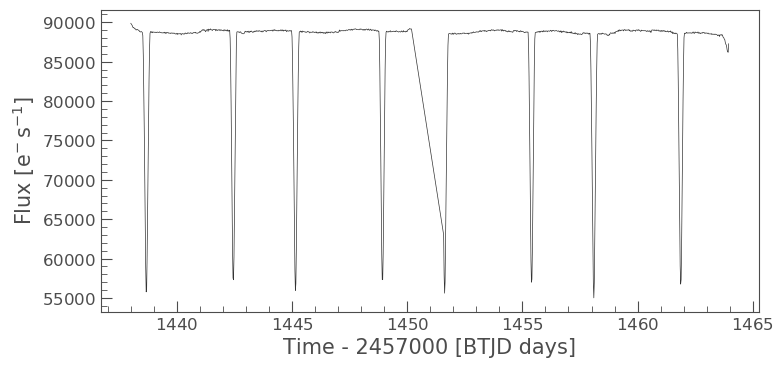

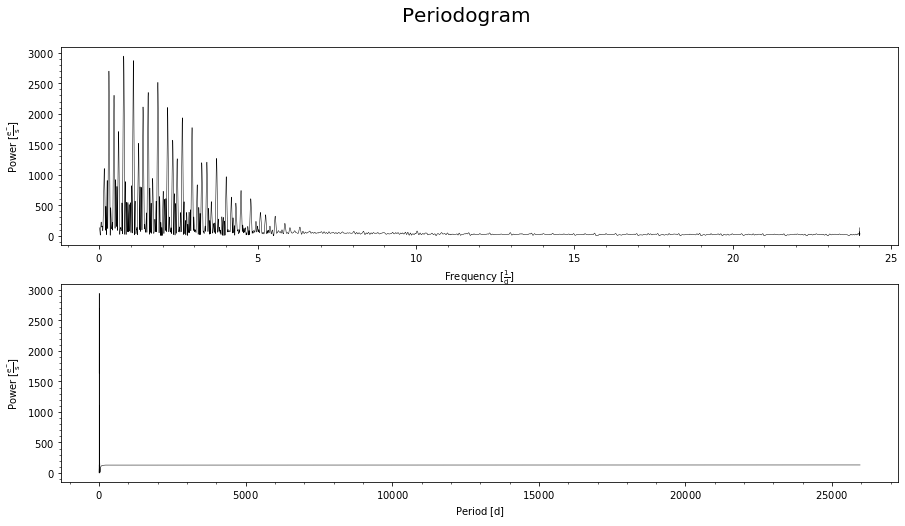

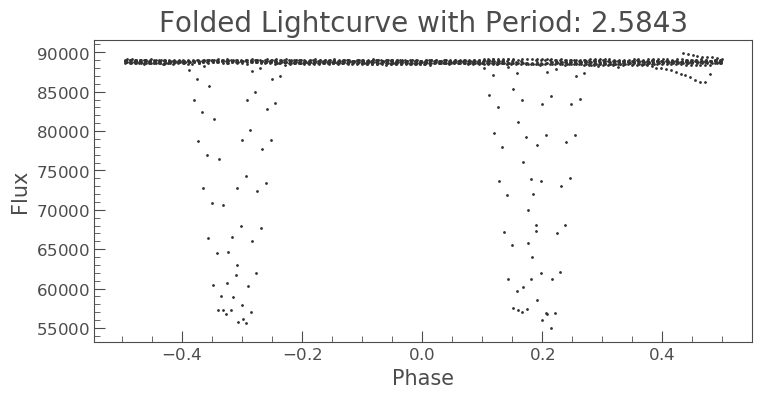

In [15]:
l = lk.TessLightCurve(eb.time, a)
l.plot()
pg = l.to_periodogram(oversample_factor=1000)
fig, axs = plt.subplots(2, 1, figsize=(15, 8))
pg.plot(ax=axs[0], c='k')
pg.plot(ax=axs[1], c='k', view='period')
fig.suptitle("Periodogram", fontsize=20, y=0.95)
period = pg.period_at_max_power
print(f"Max Power Period: {period}")
mult = 2
l.fold(period.value*mult).scatter()
plt.title(f"Folded Lightcurve with Period: {period.value*mult:.4f}", fontsize=20);

In [ ]:
# fits_file = "tess-s0002-4-2_83.272000_-69.508733_64x64_astrocut.fits"